In [78]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Part 1: read and clean the data

In [79]:
# loading files

df_2019=pd.read_csv("data/2019_Summer_Listings_Detail.csv")
df_2019.head()

,id,listing_url,description,picture_url,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood,latitude,longitude,...,beds,bed_type,guests_included,minimum_nights,number_of_reviews,requires_license,instant_bookable,require_guest_profile_picture,require_guest_phone_verification,price
0,16039481,https://www.airbnb.com/rooms/16039481,This gorgeous penthouse will have you living l...,https://a0.muscache.com/im/pictures/b3a20d13-8...,f,t,f,The Annex,43.67052,-79.39405,...,4.0,Real Bed,1,1,0,f,f,f,f,"$13,078.00"
1,20653172,https://www.airbnb.com/rooms/20653172,"Modern unit in a brand new, desirable building...",https://a0.muscache.com/im/pictures/991ec089-c...,f,t,f,Downtown Toronto,43.64906,-79.39130,...,1.0,Real Bed,1,2,4,f,f,f,f,"$13,000.00"
2,34470470,https://www.airbnb.com/rooms/34470470,Professionally decorated home in an upscale bu...,https://a0.muscache.com/im/pictures/6b94ec44-a...,f,t,f,Harbourfront,43.64143,-79.37968,...,2.0,Real Bed,2,2,10,f,f,f,f,"$9,999.00"
3,34471108,https://www.airbnb.com/rooms/34471108,Welcome to my condo! Just steps away you'll fi...,https://a0.muscache.com/im/pictures/18490331-0...,f,t,f,Entertainment District,43.64358,-79.38160,...,3.0,Real Bed,4,2,20,f,f,f,f,"$9,999.00"
4,36042527,https://www.airbnb.com/rooms/36042527,"Near the CN tower , eaton centre and other var...",https://a0.muscache.com/im/pictures/25c15266-a...,f,t,f,South Hill/Rathnelly,43.68207,-79.40405,...,6.0,Real Bed,1,4,0,f,t,f,f,"$9,999.00"


In [80]:
# checking the shape of both datasets
df_2019.shape

(21312, 23)

In [81]:
# overall information about 2019 Airbnb summer listings
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21312 entries, 0 to 21311
Data columns (total 23 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                21312 non-null  int64  
 1   listing_url                       21312 non-null  object 
 2   description                       20941 non-null  object 
 3   picture_url                       21312 non-null  object 
 4   host_is_superhost                 21300 non-null  object 
 5   host_has_profile_pic              21300 non-null  object 
 6   host_identity_verified            21300 non-null  object 
 7   neighbourhood                     21309 non-null  object 
 8   latitude                          21312 non-null  float64
 9   longitude                         21312 non-null  float64
 10  room_type                         21312 non-null  object 
 11  bathrooms                         21300 non-null  float64
 12  bedr

We need to adjust few column errors before futher exploration:

* remove $ sign at "price" and then covert it to float datatype

In [82]:
# revove $
df_2019['price'] = df_2019['price'].str.replace('$', '')
df_2019['price'] = df_2019['price'].str.replace(',', '')

<ipython-input-82-f8c376efd9b7>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df_2019['price'] = df_2019['price'].str.replace('$', '')


In [83]:
# covert data types
df_2019['price']=df_2019['price'].astype(float)

In [84]:
# check statistics
df_2019.describe()

,id,latitude,longitude,bathrooms,bedrooms,beds,guests_included,minimum_nights,number_of_reviews,price
count,2.131200e+04,21312.000000,21312.000000,21300.000000,21303.000000,21291.000000,21312.000000,21312.000000,21312.000000,21312.000000
mean,2.207339e+07,43.680110,-79.397624,1.256103,1.333099,1.693063,1.705283,6.192943,26.094548,144.591169
std,1.003851e+07,0.048248,0.061901,0.576345,0.882026,1.120943,1.386229,29.047224,47.539370,241.107697
min,1.419000e+03,43.586710,-79.623460,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,1.455048e+07,43.645000,-79.424583,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,65.000000
50%,2.305535e+07,43.662310,-79.397500,1.000000,1.000000,1.000000,1.000000,2.000000,8.000000,99.000000
75%,3.076903e+07,43.696983,-79.377778,1.000000,2.000000,2.000000,2.000000,3.000000,29.000000,165.000000
max,3.651415e+07,43.831710,-79.124850,11.500000,15.000000,17.000000,16.000000,1125.000000,725.000000,13078.000000


In [85]:
# any duplicated columns?
df_2019.transpose().duplicated()

id                                  False
listing_url                         False
description                         False
picture_url                         False
host_is_superhost                   False
host_has_profile_pic                False
host_identity_verified              False
neighbourhood                       False
latitude                            False
longitude                           False
room_type                           False
bathrooms                           False
bedrooms                            False
beds                                False
bed_type                            False
guests_included                     False
minimum_nights                      False
number_of_reviews                   False
requires_license                    False
instant_bookable                    False
require_guest_profile_picture       False
require_guest_phone_verification    False
price                               False
dtype: bool

In [86]:
# any duplicated rows
df_2019.duplicated().sum()

0

In [87]:
# checking null values by columns
pd.DataFrame({"Null_Percentage":(df_2019.isna().mean()*100),"Null_Numbers":(df_2019.isna().sum(axis=0))})

,Null_Percentage,Null_Numbers
id,0.000000,0
listing_url,0.000000,0
description,1.740803,371
picture_url,0.000000,0
host_is_superhost,0.056306,12
host_has_profile_pic,0.056306,12
host_identity_verified,0.056306,12
neighbourhood,0.014077,3
latitude,0.000000,0
longitude,0.000000,0


Before we start dealing with the null values, let's drop the "listing_url" and "picture_url" columns, since they are not what we focus on this perticular analysis for predicting the Toronto Airbnb price.

In [88]:
# drop two columns
df_2019.drop(["listing_url","picture_url"],axis=1,inplace=True)

##### looping tho. numerical columns

for "latitude" and "longitude" columns, we don't consider them as the troditional numercial columns. we'll analysis them separtately.

also breifely check all numercial columns data distrubutions

------------------------------------------
Column:  bathrooms
null values:  12
unique values:
1.0     16192
2.0      2817
1.5      1269
2.5       388
3.0       278
3.5       145
4.0        50
0.5        38
0.0        33
4.5        27
5.0        23
5.5        14
6.0        11
8.0         5
6.5         4
7.0         2
7.5         2
9.0         1
11.5        1
Name: bathrooms, dtype: int64


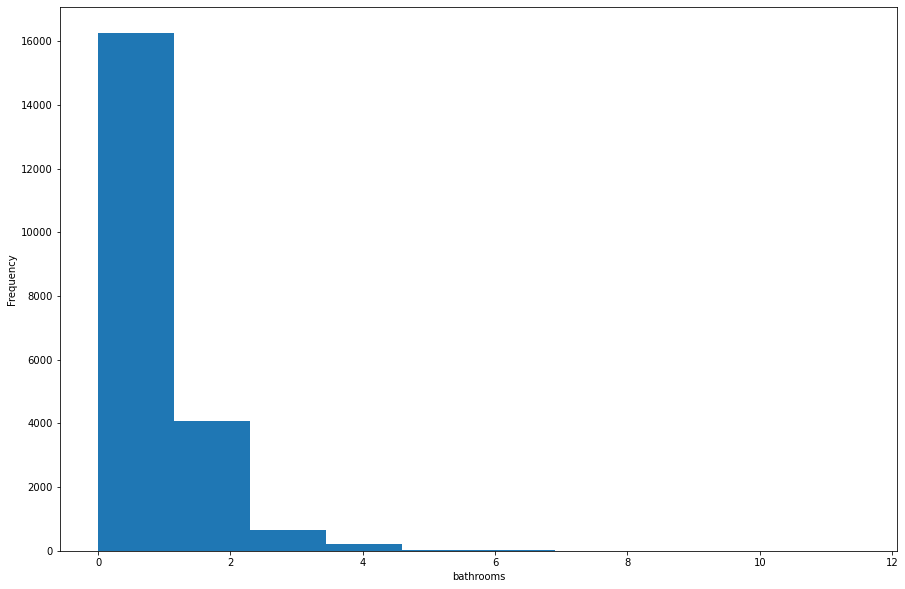



------------------------------------------
Column:  bedrooms
null values:  9
unique values:
1.0     14010
2.0      3880
0.0      1503
3.0      1341
4.0       387
5.0       112
6.0        46
8.0         6
7.0         6
9.0         5
13.0        4
10.0        2
15.0        1
Name: bedrooms, dtype: int64


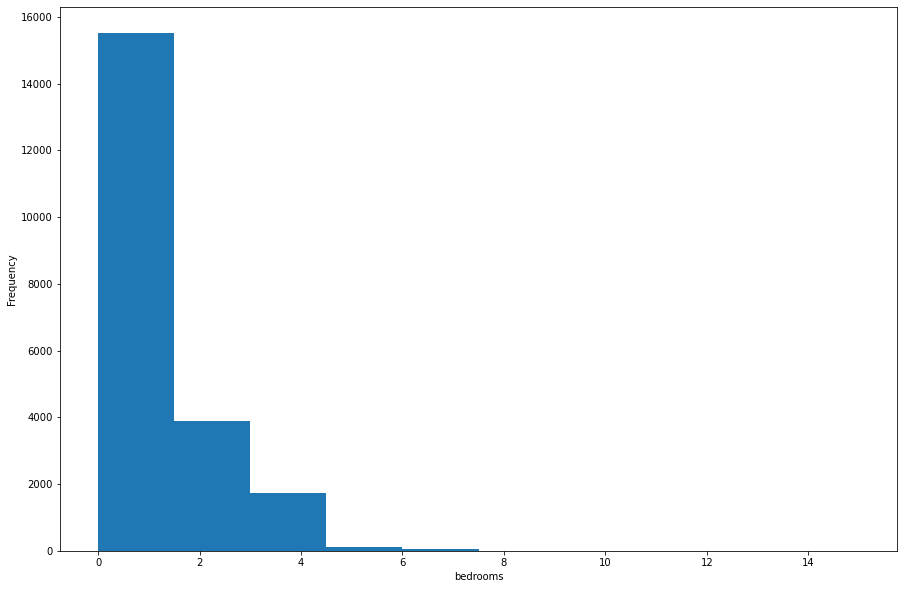



------------------------------------------
Column:  number_of_reviews
null values:  0
unique values:
0      3899
1      1911
2      1255
3       993
4       806
       ... 
423       1
455       1
216       1
328       1
383       1
Name: number_of_reviews, Length: 363, dtype: int64


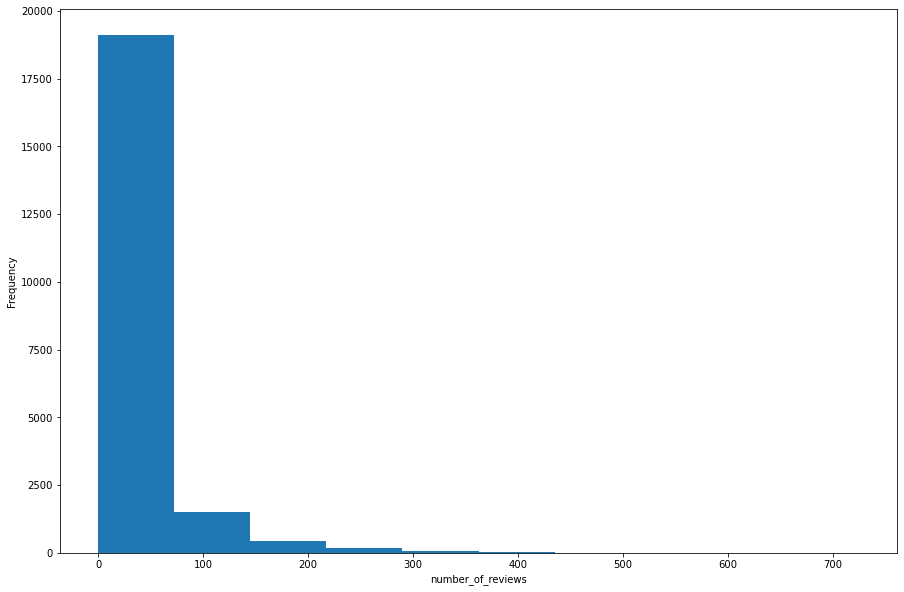



------------------------------------------
Column:  beds
null values:  21
unique values:
1.0     12308
2.0      5398
3.0      2145
4.0       778
5.0       309
6.0       123
0.0        98
7.0        58
8.0        33
9.0        16
10.0       10
11.0        5
12.0        4
17.0        3
15.0        1
14.0        1
16.0        1
Name: beds, dtype: int64


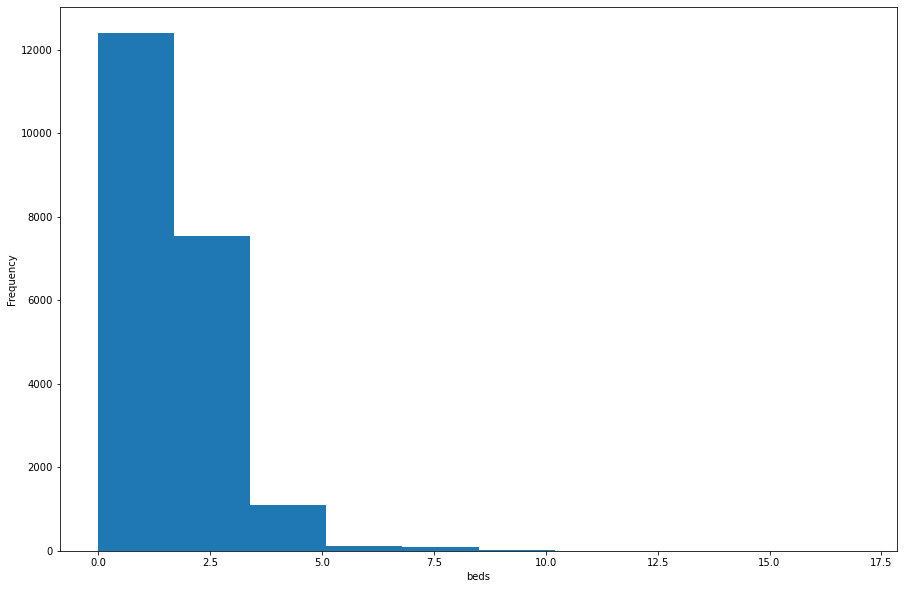



------------------------------------------
Column:  guests_included
null values:  0
unique values:
1     13777
2      4583
4      1380
3       702
6       391
5       242
8        98
10       44
7        40
16       18
12       14
9        12
14        5
15        3
11        2
13        1
Name: guests_included, dtype: int64


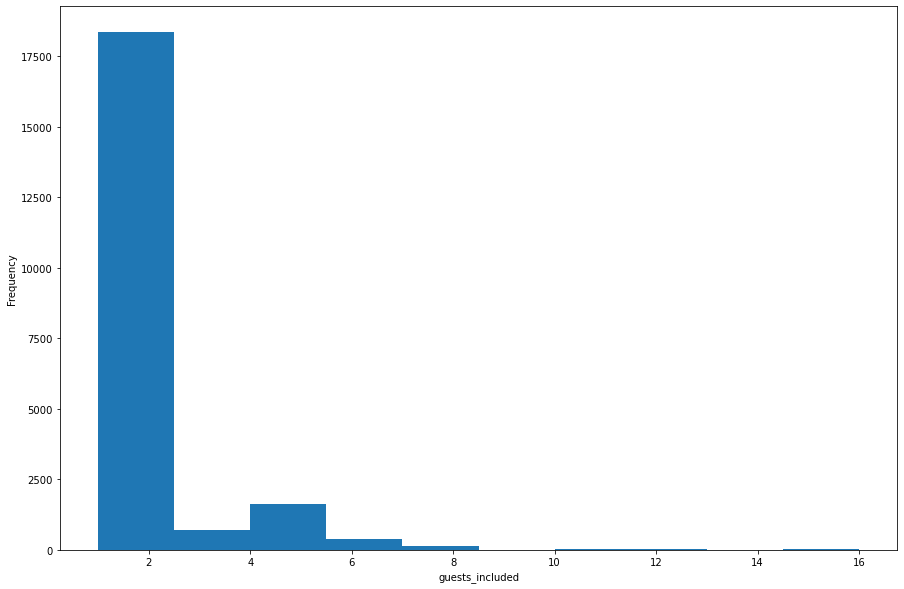



------------------------------------------
Column:  minimum_nights
null values:  0
unique values:
1      8380
2      5999
3      2631
5       869
7       797
       ... 
121       1
137       1
154       1
362       1
335       1
Name: minimum_nights, Length: 96, dtype: int64


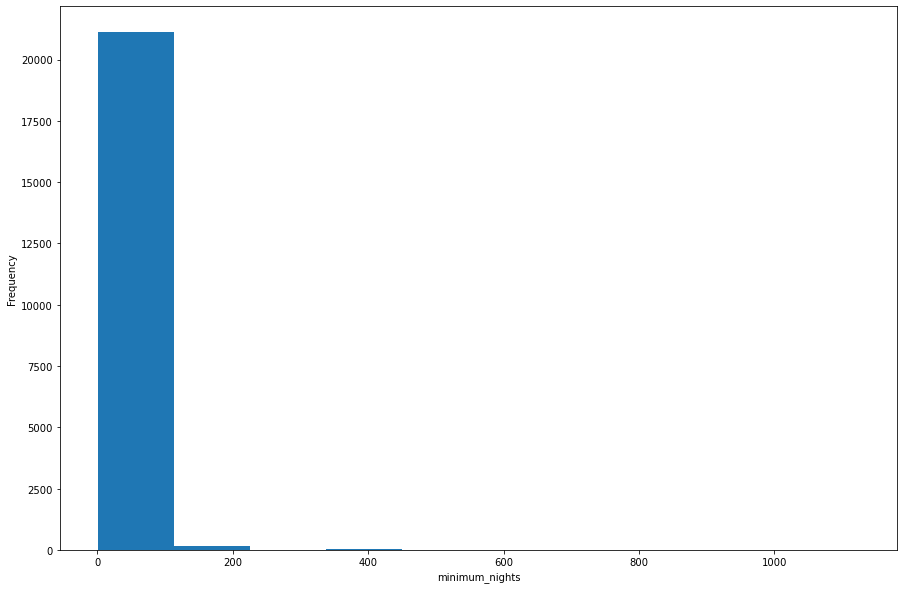



------------------------------------------
Column:  price
null values:  0
unique values:
99.0     1192
150.0     799
50.0      600
75.0      587
120.0     579
         ... 
373.0       1
232.0       1
661.0       1
514.0       1
429.0       1
Name: price, Length: 470, dtype: int64


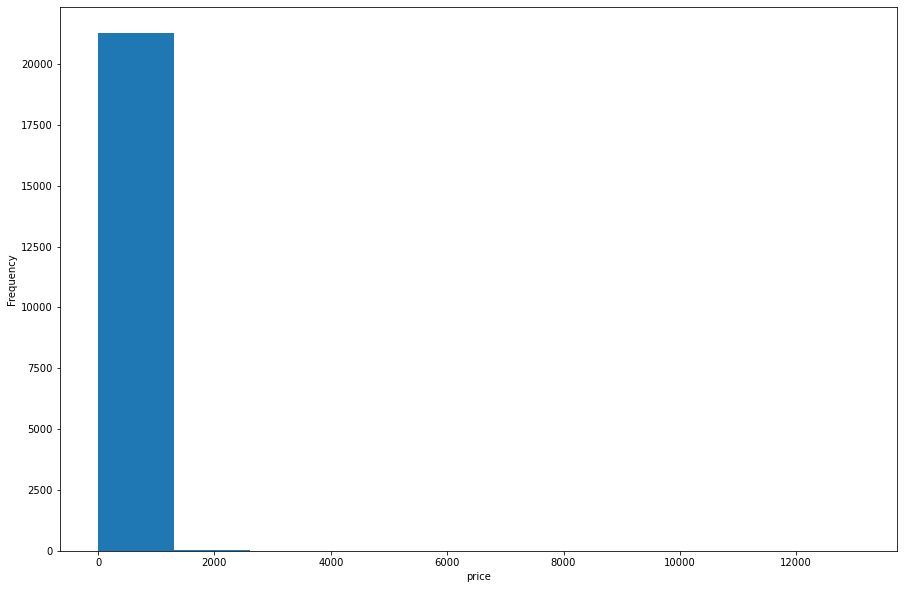

In [89]:
# looping tho. numerical columns

num_columns = ["bathrooms","bedrooms","number_of_reviews","beds","guests_included","minimum_nights","price"]

for num in num_columns:
    print("------------------------------------------")
    print("Column: ",num)
    print("null values: ", df_2019[num].isna().sum(axis=0))
    print("unique values:")
    print(df_2019[num].value_counts())
    
    # plot a histogram
    plt.figure(figsize=(15, 10))
    plt.hist(df_2019[num])
    plt.xlabel(num)
    plt.ylabel("Frequency")
    plt.show()
    
    print("\n")

##### We can see a few actions to take here:
* fill null values in the "bathrooms" with 1.0 and change it to a `binary` column
* fill null values in the "bedrooms" with 1.0 and change it to `int` data type
* fill null values in the "beds" with 1.0 and change it to `int` data type
* change "guests_included" to a `binary` column

* for "bathrooms" column:

fill the 12 null values with the 1.0 value.

also since more than 75% of the data in "bathrooms" are 1.0, let's transform the "bathrooms" column to a binary column as "more_than_one_bathroom".

In [90]:
# fill null values
df_2019["bathrooms"].fillna(1.0,inplace=True)

In [91]:
# transfrom the bathrooms column into a binary
df_2019["more_than_one_bathroom"] = (df_2019["bathrooms"]>1.0).astype(int)

In [92]:
# drop the "bathrooms" column
df_2019.drop(["bathrooms"],axis=1,inplace=True)

In [93]:
# check the data distrubution in "more_than_one_bathroom"
df_2019["more_than_one_bathroom"].value_counts()

0    16275
1     5037
Name: more_than_one_bathroom, dtype: int64

* for "bedrooms" column:

similar situation as "bathrooms" column where only a few null values and we'll fill them with the 1.0 which is the majarty of the values within the "bedrooms" column.

also since more than 65% of the data in "bedrooms" are 1.0, let's transform the "bedrooms" column to a binary column as "more_than_one_bedroom".

In [94]:
# fill null values for "bedrooms" column
df_2019["bedrooms"].fillna(1.0,inplace=True)

In [95]:
# transfrom the "bedrooms" column into a binary
df_2019["more_than_one_bedroom"] = (df_2019["bedrooms"]>1.0).astype(int)

In [96]:
# drop the "bedrooms" column
df_2019.drop(["bedrooms"],axis=1,inplace=True)

In [97]:
# check the data distrubution
df_2019["more_than_one_bedroom"].value_counts()

0    15522
1     5790
Name: more_than_one_bedroom, dtype: int64

* for "beds" column:

fill the few null values with the majaraty of 1.0 value within the column.

In [98]:
# fill null values for "beds" column
df_2019["beds"].fillna(1.0,inplace=True)

In [99]:
# conver the "beds" data type
df_2019["beds"]=(df_2019["beds"]).astype(int)

* for "guests_included" column:

more than 60% of the data in the column are 1.0 which means no guests allowed.
let's transform the "guests_included" column to a binary column as "allow_guests".

In [100]:
# conver "guests_included" to a binary column
df_2019["allow_guests"] = (df_2019["guests_included"]>1.0).astype(int)

In [101]:
# check the data distrubution
df_2019["allow_guests"].value_counts()

0    13777
1     7535
Name: allow_guests, dtype: int64

In [102]:
# drop "guests_included"
df_2019.drop(["guests_included"],axis=1,inplace=True)

##### next, looping tho. categorical columns

------------------------------------------
Column:  host_is_superhost
null values:  12
f    15606
t     5694
Name: host_is_superhost, dtype: int64


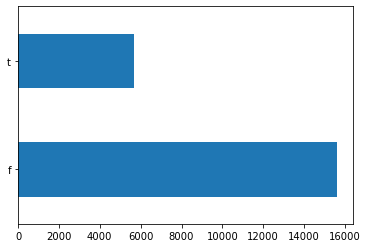



------------------------------------------
Column:  host_has_profile_pic
null values:  12
t    21253
f       47
Name: host_has_profile_pic, dtype: int64


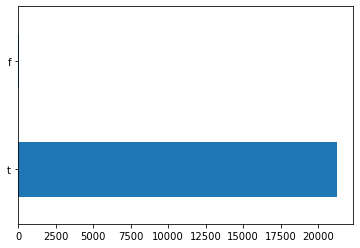



------------------------------------------
Column:  host_identity_verified
null values:  12
f    13650
t     7650
Name: host_identity_verified, dtype: int64


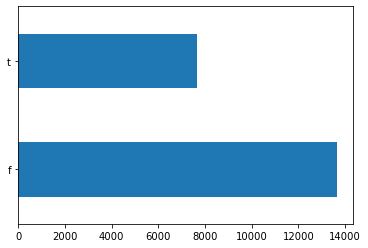



------------------------------------------
Column:  neighbourhood
null values:  3
Downtown Toronto          4871
Entertainment District    1206
Niagara                    943
Willowdale                 726
The Annex                  671
                          ... 
Manse Valley                10
Rouge                        8
Markland Woods               7
Toronto Islands              7
Beachborough                 2
Name: neighbourhood, Length: 140, dtype: int64


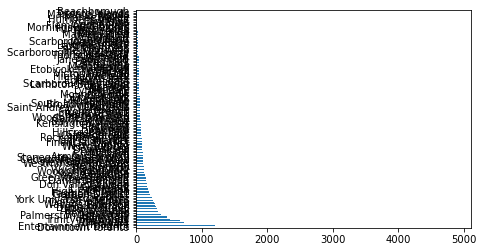



------------------------------------------
Column:  room_type
null values:  0
Entire home/apt    13800
Private room        7171
Shared room          341
Name: room_type, dtype: int64


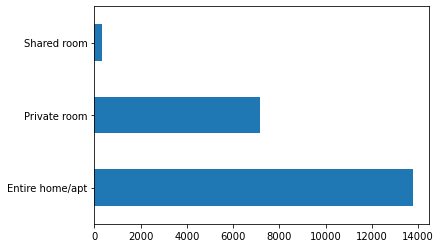



------------------------------------------
Column:  bed_type
null values:  0
Real Bed         21026
Futon              133
Pull-out Sofa       86
Airbed              36
Couch               31
Name: bed_type, dtype: int64


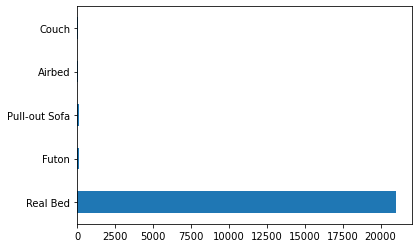



------------------------------------------
Column:  requires_license
null values:  0
f    21312
Name: requires_license, dtype: int64


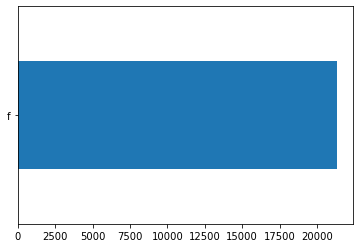



------------------------------------------
Column:  instant_bookable
null values:  0
f    12872
t     8440
Name: instant_bookable, dtype: int64


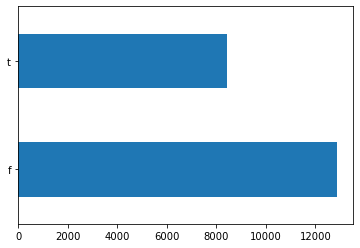



------------------------------------------
Column:  require_guest_profile_picture
null values:  0
f    21138
t      174
Name: require_guest_profile_picture, dtype: int64


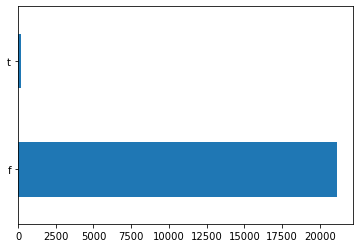



------------------------------------------
Column:  require_guest_phone_verification
null values:  0
f    21071
t      241
Name: require_guest_phone_verification, dtype: int64


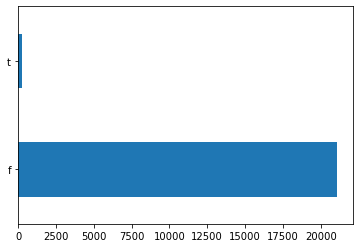

In [104]:
# looping tho. categorical columns

cat_columns = ["host_is_superhost", "host_has_profile_pic","host_identity_verified","neighbourhood",
                "room_type","bed_type","requires_license","instant_bookable",
              "require_guest_profile_picture","require_guest_phone_verification"]

for cat in cat_columns:
    print("------------------------------------------")
    print("Column: ",cat)
    print("null values: ", df_2019[cat].isna().sum(axis=0))
    print(df_2019[cat].value_counts())
    
    # plot a histogram
    df_2019[cat].value_counts().plot(kind='barh')
    plt.show()
    
    print("\n")

We can see a few obvious actions to be taken here:
* "host_is_superhost" fill null values and convert it to a binary column
* "host_has_profile_pic" drop the column
* "host_identity_verified" fill null values and convert it to a binary column
* "neighbourhood" drop null values
* "bed_type" convert it to a binary column
* "requires_license" drop the column
* "instant_bookable" convert it to a binary column
* "require_guest_profile_picture" drop the column
* "require_guest_phone_verification" drop the column

In [105]:
# fill the null values in "host_is_superhost"
df_2019["host_is_superhost"].fillna("f",inplace=True)
# convert it to a binary column
df_2019["host_is_superhost"].replace({"f":0,"t":1},inplace=True)
# check unique values
df_2019["host_is_superhost"].value_counts()

0    15618
1     5694
Name: host_is_superhost, dtype: int64

In [106]:
# drop "host_has_profile_pic" column
# since 99% of the values are same
df_2019.drop(["host_has_profile_pic"],axis=1,inplace=True)

In [107]:
# fill the null values in "host_identity_verified"
df_2019["host_identity_verified"].fillna("f",inplace=True)
# convert it to a binary column
df_2019["host_identity_verified"].replace({"f":0,"t":1},inplace=True)
# check unique values
df_2019["host_identity_verified"].value_counts()

0    13662
1     7650
Name: host_identity_verified, dtype: int64

In [108]:
# drop only 3 null values in "neighbourhood" column
df_2019.dropna(subset=["neighbourhood"],inplace=True)

In [109]:
# convert "bed_type" into binary
df_2019["bed_type"].replace({"Real Bed":1,"Futon":0,"Pull-out Sofa":0,"Airbed":0,"Couch":0},inplace=True)
# rename
df_2019.rename(columns={"bed_type":"Is_Real_Bed"},inplace=True)
# check unique values
df_2019["Is_Real_Bed"].value_counts()

1    21023
0      286
Name: Is_Real_Bed, dtype: int64

In [110]:
# drop "requires_license" column
# only has one value, useless for analysis
df_2019.drop(["requires_license"],axis=1,inplace=True)

In [111]:
# convert "instant_bookable" into a binary column
df_2019["instant_bookable"].replace({"f":0,"t":1},inplace=True)
# checking unique values
df_2019["instant_bookable"].value_counts()

0    12869
1     8440
Name: instant_bookable, dtype: int64

In [112]:
# in "require_guest_profile_picture" only 174 rows with "t"
# around than 1% of the dataset, let's drop the column
df_2019.drop(["require_guest_profile_picture"],axis=1,inplace=True)

In [113]:
# in "require_guest_phone_verification" only 241 rows with "t"
# less than 1.2% of the dataset, let's drop the column
df_2019.drop(["require_guest_phone_verification"],axis=1,inplace=True)

In [114]:
# drop 371 null values in "description" column
# about 1.7% of the whole data and no currect way to fill the null ways
df_2019.dropna(subset=["description"],inplace=True)

In [115]:
# check shape and null values tho. the whole dataset
display(df_2019.shape)
display(df_2019.isna().sum())

(20938, 17)

id                        0
description               0
host_is_superhost         0
host_identity_verified    0
neighbourhood             0
latitude                  0
longitude                 0
room_type                 0
beds                      0
Is_Real_Bed               0
minimum_nights            0
number_of_reviews         0
instant_bookable          0
price                     0
more_than_one_bathroom    0
more_than_one_bedroom     0
allow_guests              0
dtype: int64

after fill the null values and adjust columns, at this stage df_2019 columns reduced from 23 to 17.
cleaned data are ready to explore more.

### Part 2: exploring the data

It's always a good idea to do some EDA to familiarize the dataset

since the `price` is our target, we gonna start to look at the distributions of the variables comparing them with the average price.

In [116]:
# the most pricey airbnb listing the Toronto area
df_2019.loc[df_2019['price'].idxmax()]
df_2019.sort_values('price',ascending=False).iloc[:10,]

,id,description,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,beds,Is_Real_Bed,minimum_nights,number_of_reviews,instant_bookable,price,more_than_one_bathroom,more_than_one_bedroom,allow_guests
0,16039481,This gorgeous penthouse will have you living l...,0,0,The Annex,43.67052,-79.39405,Entire home/apt,4,1,1,0,0,13078.0,1,1,0
1,20653172,"Modern unit in a brand new, desirable building...",0,0,Downtown Toronto,43.64906,-79.39130,Entire home/apt,1,1,2,4,0,13000.0,0,0,0
2,34470470,Professionally decorated home in an upscale bu...,0,0,Harbourfront,43.64143,-79.37968,Entire home/apt,2,1,2,10,0,9999.0,0,1,1
4,36042527,"Near the CN tower , eaton centre and other var...",0,0,South Hill/Rathnelly,43.68207,-79.40405,Entire home/apt,6,1,4,0,1,9999.0,1,1,0
3,34471108,Welcome to my condo! Just steps away you'll fi...,0,0,Entertainment District,43.64358,-79.38160,Entire home/apt,3,1,2,20,0,9999.0,0,0,1
5,33983450,Luxury in the city near ravines and downtown. ...,0,0,Casa Loma,43.68080,-79.41312,Entire home/apt,5,1,3,0,1,7500.0,1,1,0
6,17330866,A very private room in the beautiful Toronto's...,1,1,High Park North,43.65899,-79.47807,Private room,2,1,1,34,1,5900.0,1,0,0
7,36311619,"Luxury, custom built home located in a well de...",1,1,Willowdale,43.76654,-79.42509,Entire home/apt,8,1,1,0,1,4499.0,1,1,1
8,13788645,Gaze out across the top of Toronto's chic York...,0,1,The Annex,43.67174,-79.39218,Entire home/apt,3,1,1,14,0,4000.0,1,1,1
10,18525305,"Built circa 1930, this elegant and updated For...",0,0,Forest Hill,43.70323,-79.42418,Entire home/apt,6,1,7,0,0,3571.0,1,1,0


as we expected the top 10 expensive Airbnb in Toronto area are mostly provided the Entire home/apt, and not all of them are instant bookable which make sence, the hosts need more time to prepare the place.
the average price are more than $5000, majarty of them provide more than one bedroom and bathrooms, and allowing guests.

In [117]:
# the most afforadble airbnb listing the Toronto area
df_2019.loc[df_2019['price'].idxmax()]
df_2019.sort_values('price',ascending=True).iloc[:10,]

,id,description,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,beds,Is_Real_Bed,minimum_nights,number_of_reviews,instant_bookable,price,more_than_one_bathroom,more_than_one_bedroom,allow_guests
21311,20715061,Our place is located at Don Mills & Finch. Jus...,0,0,Hillcrest Village,43.80187,-79.34827,Private room,1,1,1,28,0,0.0,0,0,1
21308,20235002,Fully furnished one-bedroom ready for your sta...,0,0,Little Portugal,43.64350,-79.42757,Entire home/apt,0,1,3,7,1,0.0,0,0,0
21310,20579837,"Quiet, trendy home located 5 minutes walk from...",0,1,Dovercourt Park,43.66675,-79.43159,Entire home/apt,2,1,30,0,0,0.0,0,1,0
21309,20350463,Managed by a professional property management ...,0,1,Agincourt,43.81379,-79.27218,Private room,1,1,5,29,1,0.0,0,0,0
21297,22262372,A cozy 2 bedroom condo in a quite neighborhood...,0,0,Willowdale,43.76621,-79.41287,Private room,3,1,1,0,0,13.0,0,0,0
21298,22345053,Enjoy the luxurious condo living and the stunn...,1,1,Downtown Toronto,43.64996,-79.38751,Entire home/apt,2,1,5,33,0,13.0,0,0,1
21299,24856616,Condo located across Bayview station and in fr...,0,1,Henry Farm,43.76550,-79.38431,Entire home/apt,3,1,6,8,0,13.0,0,1,1
21300,25404173,Our home is ready to use for the guest it's pr...,0,0,Malvern,43.81184,-79.22869,Private room,1,1,5,3,0,13.0,0,0,0
21301,30235108,"Cozy, quiet, and modern space with queen bed i...",0,0,Niagara,43.63787,-79.40116,Entire home/apt,2,1,3,2,0,13.0,0,0,0
21307,34560378,Welcome to our Home:)Offering clean&cozy rooms...,1,0,Malvern,43.80550,-79.22673,Shared room,1,1,1,0,1,13.0,0,0,0


uhnn, seems like there're some pricing errors in the dataset that we need to do futher analysis.
obiuvsly price = 0 lists are errors we need to remove them.

Also those under $50 could be people are only renting out their parking spaces.

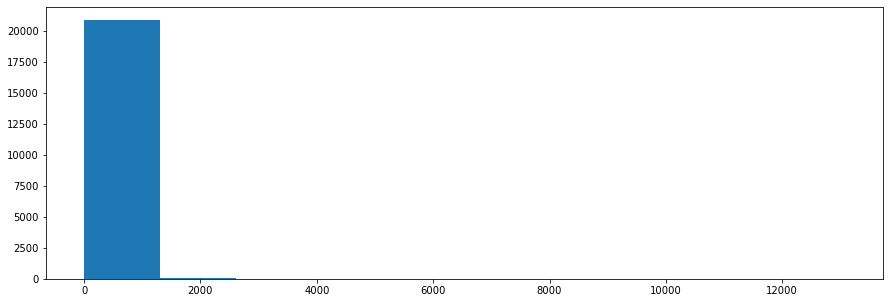

In [118]:
# ploting overall price
plt.figure(figsize=(15,5))
plt.hist(df_2019["price"])
plt.show()

looks like the majarty of rental price are under $1500.

let's take a close look:

C:\Users\Tao\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


144.53262011653453

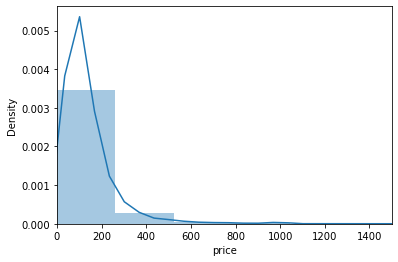

In [119]:
# create a visualization for the price distribution under $1500
sns.distplot(df_2019.price)
plt.xlim(0,1500)
df_2019.price.mean()

The average listing price of Toronto airbnb based on the 2019 dataset we've collected is around $144 per night.

and tho. the histogram, we can see that most of the options were priced between 50 to 300 dollars per night.

##### average price by neighbourhood

In [121]:
avg_price_neighbourhood = df_2019.groupby("neighbourhood").agg("mean")["price"].reset_index()

In [122]:
avg_price_neighbourhood.sort_values('price', ascending=False)

,neighbourhood,price
12,Casa Loma,365.823529
105,South Hill/Rathnelly,357.156863
121,Toronto Islands,329.833333
108,Sunnybrook,326.217391
38,Forest Hill,246.333333
...,...,...
72,Morningside Heights,57.500000
125,West Hill,57.081081
65,Malvern,56.744444
55,Jane and Finch,54.294118


##### Maping

In [123]:
import os
import geopandas as gpd
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math

In [124]:
tobnb = gpd.GeoDataFrame(df_2019, geometry = gpd.points_from_xy(df_2019.longitude,df_2019.latitude))
# to blur the PII from the dataset
tobnb.drop(['id','description'],axis=1,inplace=True)
tobnb.crs = {'init': 'epsg:4326'}

C:\Users\Tao\anaconda3\envs\geo_env\lib\site-packages\pyproj\crs\crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


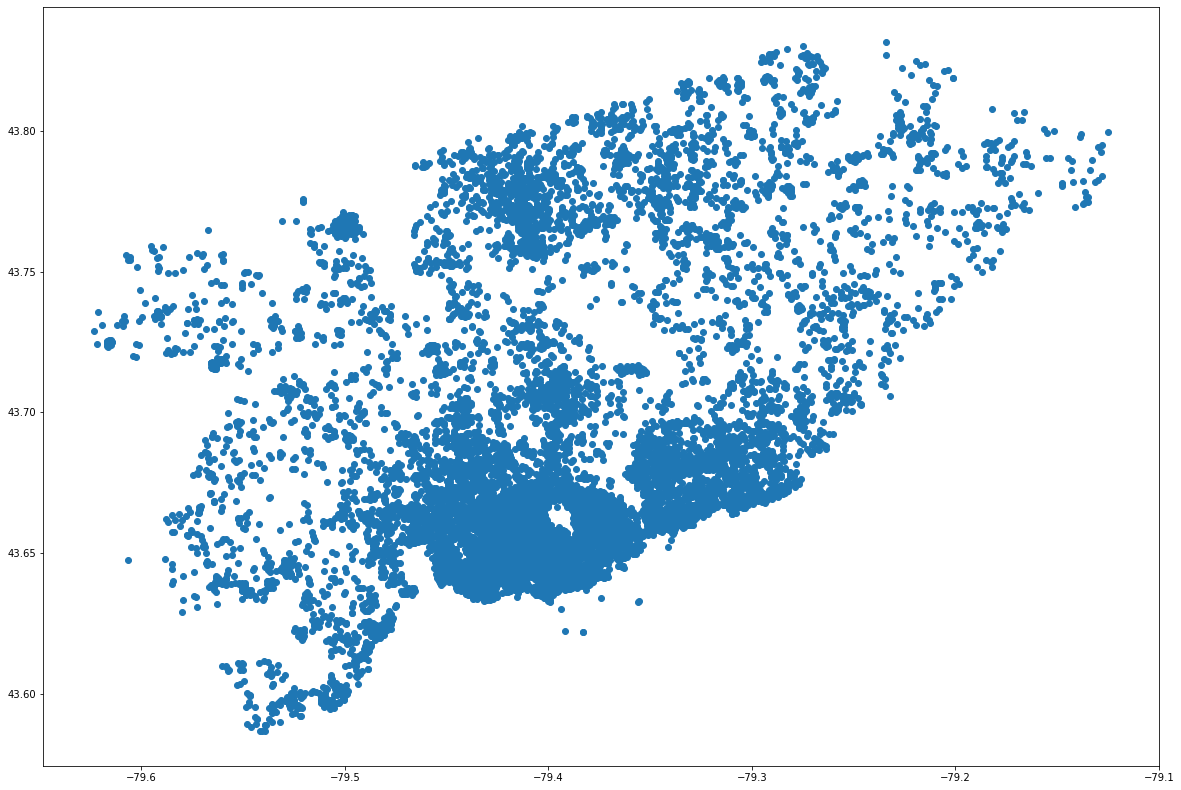

In [125]:
# an unoptimized map where you can roughly see Toronto GTA's shape
d_map = tobnb.plot(figsize=(20,20))

In [126]:
# Visualizing listings based on longitude and latitude
def embed_map(m, file_name):
    from IPython.display import IFrame
    m.save(file_name)
    return IFrame(file_name, width='100%', height='300px')

In [127]:
# create a map
im = folium.Map(location=[43.6532,-79.3832], tiles='openstreetmap', zoom_start=13)
embed_map(im, 'im.html')

In [128]:
# a more human readable way than plotting every single occurence 
im3 = folium.Map(location=[43.6532,-79.3832], tiles='cartodbpositron', zoom_start=13)
mc = MarkerCluster()
for idx, row in tobnb.iterrows():
    if not math.isnan(row['longitude']) and not math.isnan(row['latitude']):
        mc.add_child(Marker([row['latitude'], row['longitude']]))
im3.add_child(mc)
embed_map(im3,'im3.html')

In [129]:
# visualization by a heatmap
im4 = folium.Map(location=[43.6532,-79.3832], tiles='cartodbpositron', zoom_start=11)
HeatMap(data=tobnb[['latitude','longitude']],radius=10).add_to(im4)
embed_map(im4,'im4.html')

maping instruction by: https://www.kaggle.com/hamiltonjie/data-exploration-on-toronto-airbnb

From the EDA above, we looked at the distribution of the listings and price ranges. More than 70% of the 2019 Airbnb listings were around Downtown Toronto area. Also tho. the heatmap, we noticed that there were far more listings along the Yonge street or Front Lake area.
Mostly of the reantal are price friends for a shared or a sinle room, from 100 to 300 dollars per night.

##### Quick inspection other columns

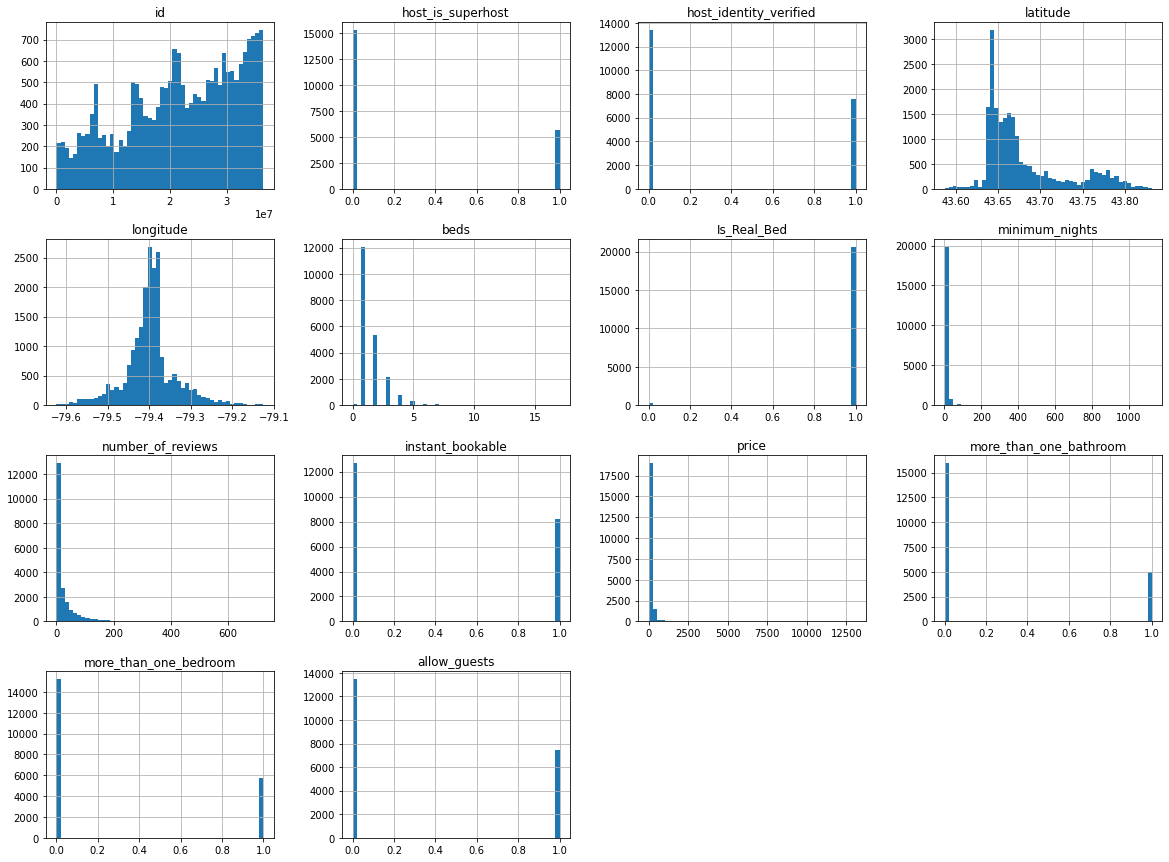

In [130]:
df_2019.hist(bins=50, figsize=(20,15))
plt.show()

Looks like most of the data are not normally distributed. we might need to scale the datasets for a better machine learning performance.

In [134]:
df_2019

,id,description,host_is_superhost,host_identity_verified,neighbourhood,latitude,longitude,room_type,beds,Is_Real_Bed,minimum_nights,number_of_reviews,instant_bookable,price,more_than_one_bathroom,more_than_one_bedroom,allow_guests,geometry
0,16039481,This gorgeous penthouse will have you living l...,0,0,The Annex,43.67052,-79.39405,Entire home/apt,4,1,1,0,0,13078.0,1,1,0,POINT (-79.39405 43.67052)
1,20653172,"Modern unit in a brand new, desirable building...",0,0,Downtown Toronto,43.64906,-79.39130,Entire home/apt,1,1,2,4,0,13000.0,0,0,0,POINT (-79.39130 43.64906)
2,34470470,Professionally decorated home in an upscale bu...,0,0,Harbourfront,43.64143,-79.37968,Entire home/apt,2,1,2,10,0,9999.0,0,1,1,POINT (-79.37968 43.64143)
3,34471108,Welcome to my condo! Just steps away you'll fi...,0,0,Entertainment District,43.64358,-79.38160,Entire home/apt,3,1,2,20,0,9999.0,0,0,1,POINT (-79.38160 43.64358)
4,36042527,"Near the CN tower , eaton centre and other var...",0,0,South Hill/Rathnelly,43.68207,-79.40405,Entire home/apt,6,1,4,0,1,9999.0,1,1,0,POINT (-79.40405 43.68207)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21307,34560378,Welcome to our Home:)Offering clean&cozy rooms...,1,0,Malvern,43.80550,-79.22673,Shared room,1,1,1,0,1,13.0,0,0,0,POINT (-79.22673 43.80550)
21308,20235002,Fully furnished one-bedroom ready for your sta...,0,0,Little Portugal,43.64350,-79.42757,Entire home/apt,0,1,3,7,1,0.0,0,0,0,POINT (-79.42757 43.64350)
21309,20350463,Managed by a professional property management ...,0,1,Agincourt,43.81379,-79.27218,Private room,1,1,5,29,1,0.0,0,0,0,POINT (-79.27218 43.81379)
21310,20579837,"Quiet, trendy home located 5 minutes walk from...",0,1,Dovercourt Park,43.66675,-79.43159,Entire home/apt,2,1,30,0,0,0.0,0,1,0,POINT (-79.43159 43.66675)


In [135]:
# "price" drop under $50
# ① onehot encode "room_type", ignore "neighbourhood"
# ② sklearn - linear - scaling - piplines - begging - boosting
# ③ NLP - scaling - basic linear - begging - boosting
# ④ comparing ② ③